# Importy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

___
# Zadanie 1

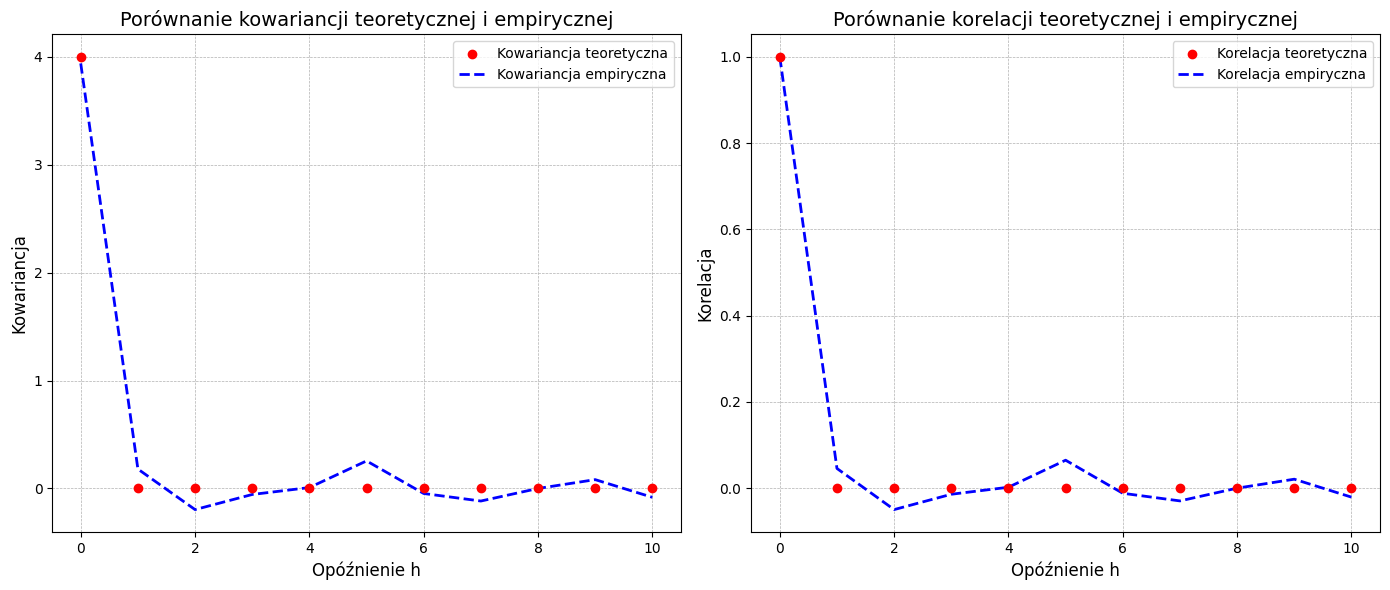

In [8]:
n = 1000
xi = np.random.normal(loc=0, scale=2, size=n)
h_values = np.arange(0, 11)


def kowariancja(h):
    if h == 0:
        return 4
    return 0

def korelacja(h):
    if h == 0:
        return 1
    return 0

def autokowariancja(h, x_trajectory):
    n = len(x_trajectory)
    x = x_trajectory[:n - np.abs(h)]
    xh = x_trajectory[np.abs(h):]
    x_mean = np.mean(x_trajectory)
    return (1/n) * np.sum((x - x_mean) * (xh - x_mean))

def autokorelacja(h, x_trajectory):
    return autokowariancja(h, x_trajectory) / autokowariancja(0, x_trajectory)

teoretyczne_cov = []
teoretyczne_kor = []
empiryczne_cov = []
empiryczne_kor = []

for h in h_values:
    teoretyczne_cov.append(kowariancja(h))
    teoretyczne_kor.append(korelacja(h))
    empiryczne_cov.append(autokowariancja(h, xi))
    empiryczne_kor.append(autokorelacja(h, xi))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(h_values, teoretyczne_cov, color='red', label='Kowariancja teoretyczna', zorder=5)
plt.plot(h_values, empiryczne_cov, color='blue', linestyle='--', label='Kowariancja empiryczna', linewidth=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Opóźnienie h', fontsize=12)
plt.ylabel('Kowariancja', fontsize=12)
plt.title('Porównanie kowariancji teoretycznej i empirycznej', fontsize=14)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(h_values, teoretyczne_kor, color='red', label='Korelacja teoretyczna', zorder=5)
plt.plot(h_values, empiryczne_kor, color='blue', linestyle='--', label='Korelacja empiryczna', linewidth=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Opóźnienie h', fontsize=12)
plt.ylabel('Korelacja', fontsize=12)
plt.title('Porównanie korelacji teoretycznej i empirycznej', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

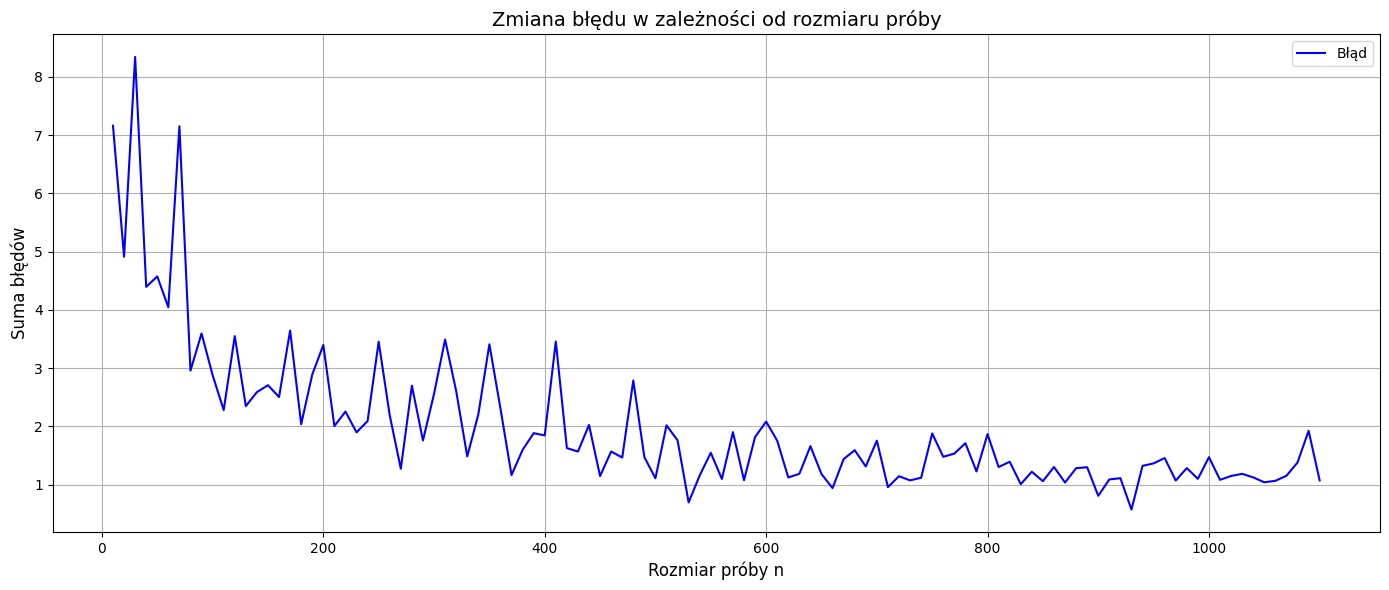

In [4]:
n_values = np.arange(10, 1101, 10)
h_values = np.arange(0, 11)

errors = []
for n in n_values:
    error = 0
    x = np.random.normal(loc=0, scale=2, size=n)
    for h in h_values:
        error += np.abs(autokowariancja(h, x) - kowariancja(h))
    errors.append(error)

plt.figure(figsize=(14, 6))
plt.plot(n_values, errors, color='blue', label='Błąd')
plt.grid(True)
plt.xlabel('Rozmiar próby n', fontsize=12)
plt.ylabel('Suma błędów', fontsize=12)
plt.title('Zmiana błędu w zależności od rozmiaru próby', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

___
# Zadanie 2

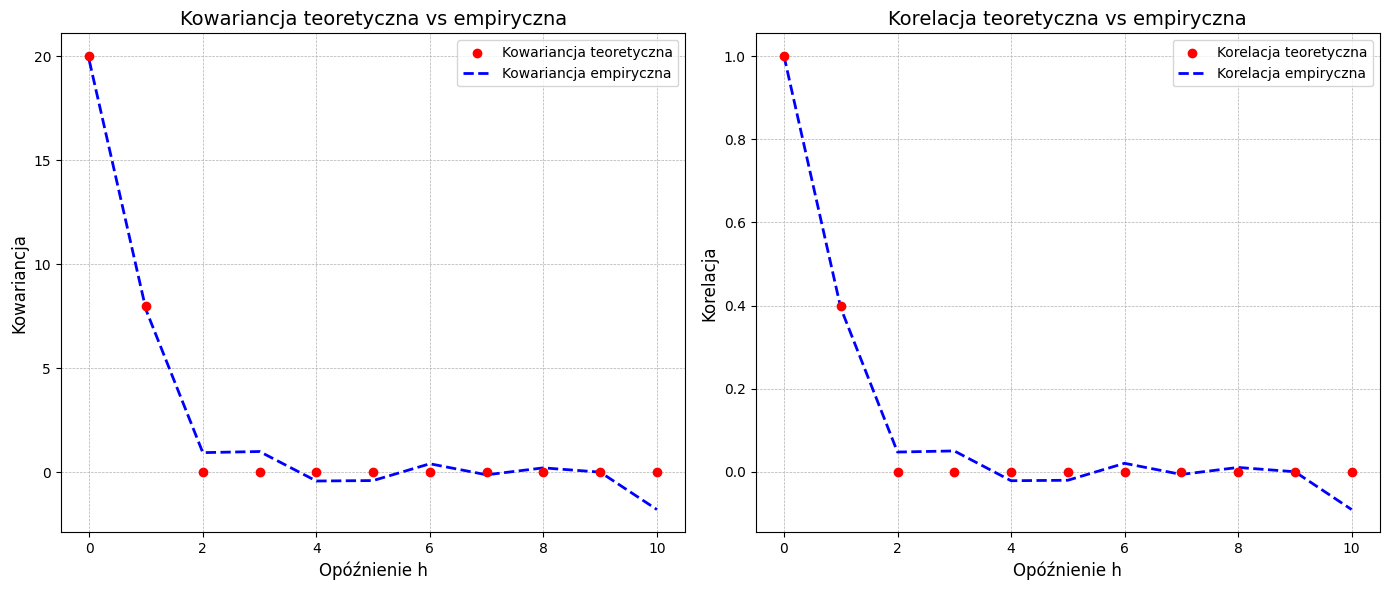

In [10]:
sigma = 2
teta = 2
n = 1000
h_values = np.arange(0,11)

def kowariancja(h, sigma, theta):
    if h == 0:
        return (sigma ** 2) * (1 + (theta ** 2))
    if h == 1 or h == -1:
        return theta * (sigma ** 2)
    return 0
 
def korelacja(h, sigma, theta):
    if h == 0:
        return 1
    if h == 1 or h == -1:
        return theta / (1 + (sigma**2))
    return 0

def autokowariancja(h, x_trajectory):
    n = len(x_trajectory)
    x_mean = np.mean(x_trajectory)
 
    x = x_trajectory[:n - h]
    x_h = x_trajectory[h:]
 
    return (1 / n) * np.sum((x - x_mean) * (x_h - x_mean))
 
def autokorelacja(h, x_trajectory):
    return autokowariancja(h, x_trajectory) / autokowariancja(0, x_trajectory)


z_trajectory = np.random.normal(loc=0, scale=sigma, size=n)
x_t = np.zeros(n)
 
for i in range(1, n):
    x_t[i] = z_trajectory[i] + teta * z_trajectory[i - 1]
 
x_t = x_t[1:]

teo_kow = np.zeros(len(h_values))
teo_kor = np.zeros(len(h_values))
emp_kow = np.zeros(len(h_values))
emp_kor = np.zeros(len(h_values))
 
for i in range(len(h_values)):
    h = h_values[i]
 
    teo_kow[i] = kowariancja(h, sigma, teta)
    teo_kor[i] = korelacja(h, sigma, teta)
 
    emp_kow[i] = autokowariancja(h, x_t)
    emp_kor[i] = autokorelacja(h, x_t)


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(h_values, teo_kow, color='red', label='Kowariancja teoretyczna', zorder=5)
plt.plot(h_values, emp_kow, color='blue', linestyle='--', label='Kowariancja empiryczna', linewidth=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Opóźnienie h', fontsize=12)
plt.ylabel('Kowariancja', fontsize=12)
plt.title('Kowariancja teoretyczna vs empiryczna', fontsize=14)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(h_values, teo_kor, color='red', label='Korelacja teoretyczna', zorder=5)
plt.plot(h_values, emp_kor, color='blue', linestyle='--', label='Korelacja empiryczna', linewidth=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Opóźnienie h', fontsize=12)
plt.ylabel('Korelacja', fontsize=12)
plt.title('Korelacja teoretyczna vs empiryczna', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

___
# Zadanie 3

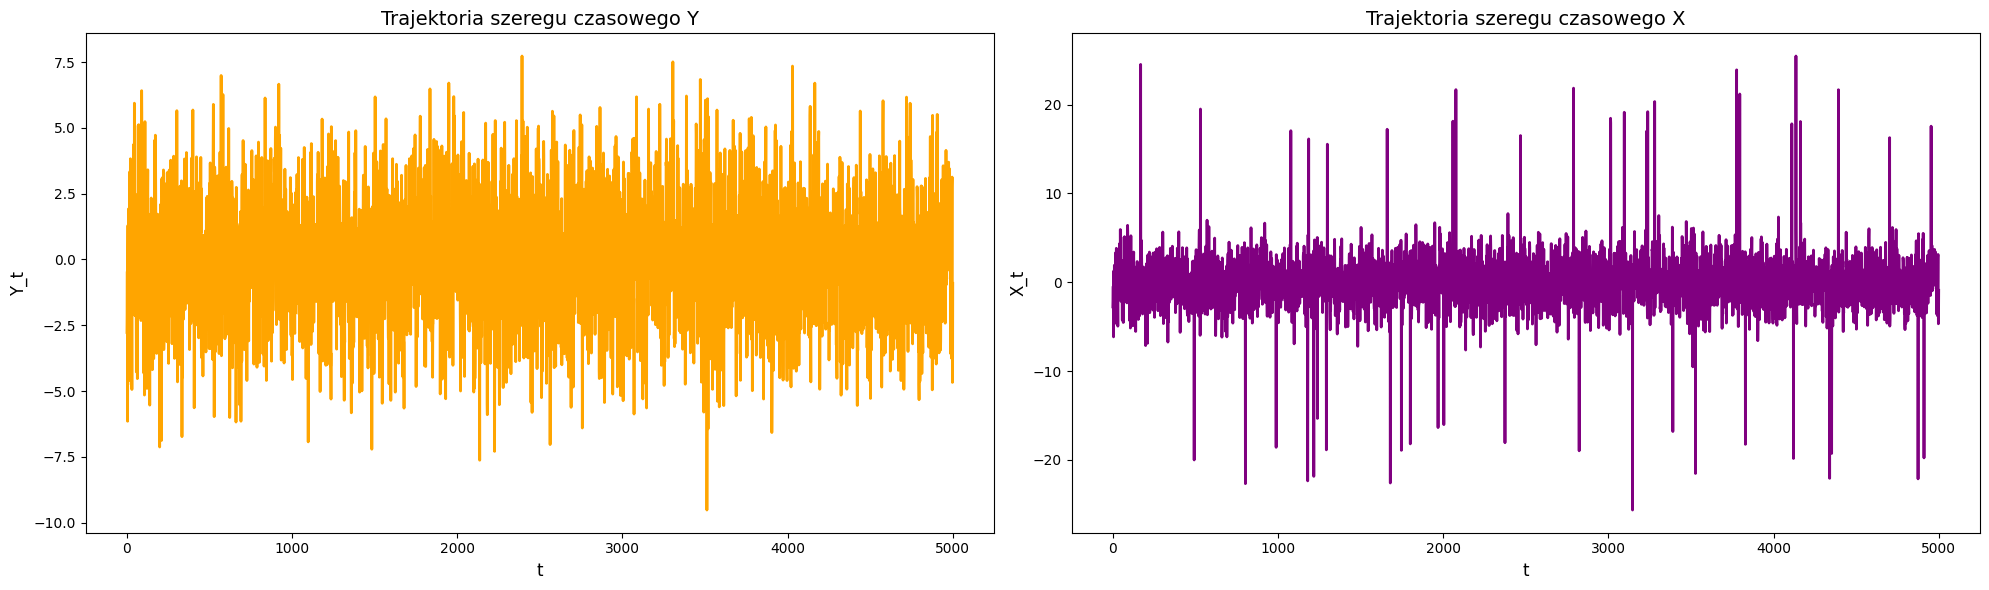

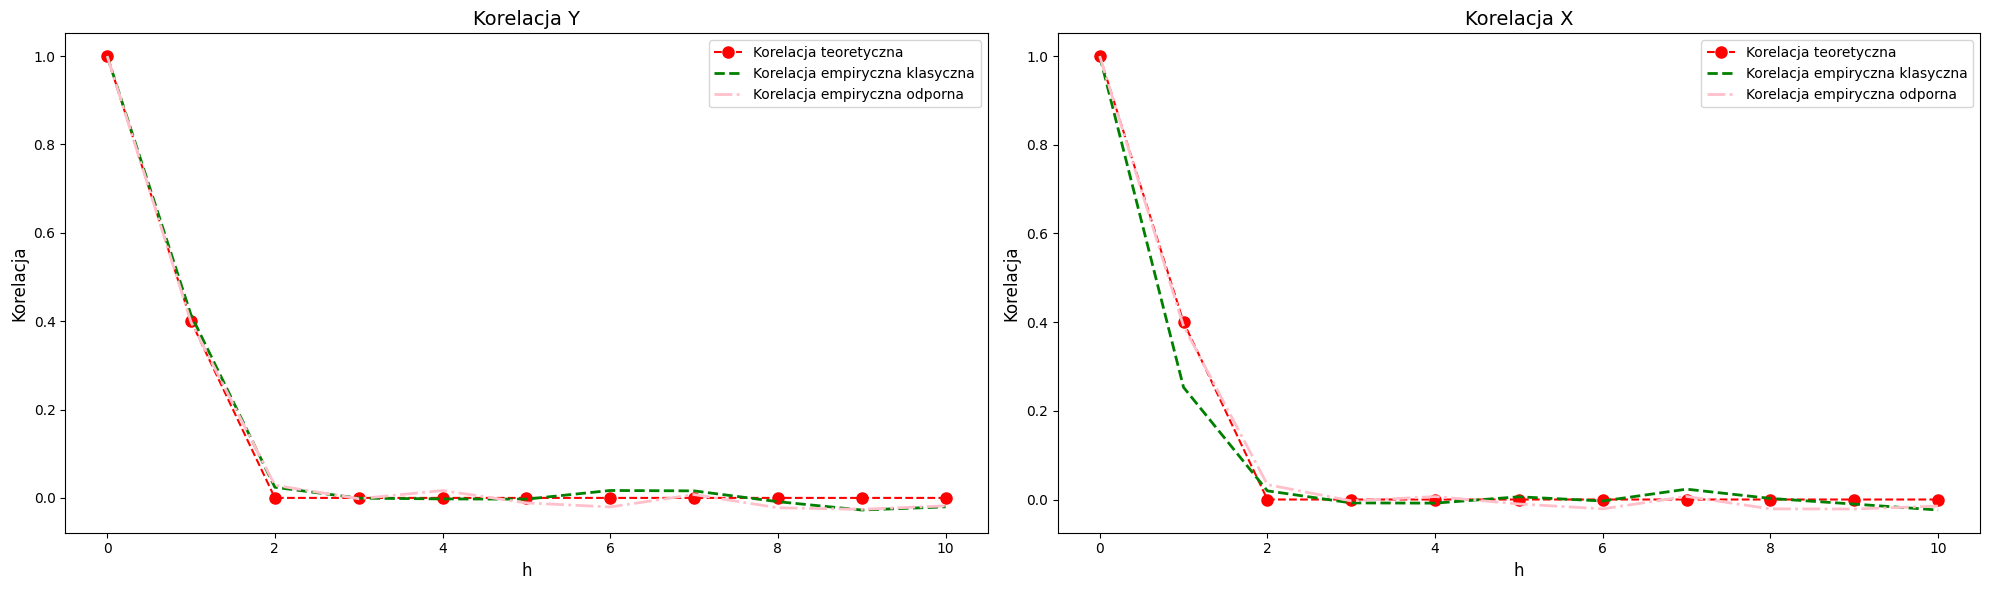

In [11]:
def korelacja(h, theta):
    if h == 0:
        return 1
    if h == 1 or h == -1:
        return theta / (1 + (theta**2))
    return 0

def autokowariancja(h, x_trajectory):
    n = len(x_trajectory)
    x_mean = np.mean(x_trajectory)
 
    x = x_trajectory[:n - h]
    x_h = x_trajectory[h:]
 
    return (1 / n) * np.sum((x - x_mean) * (x_h - x_mean))
 
def autokorelacja_klasyczna(h, x_trajectory):
    return autokowariancja(h, x_trajectory) / autokowariancja(0, x_trajectory)

def autokorelacja_odporna(h, x_trajectory):
    x_med = np.median(x_trajectory)
    n = len(x_trajectory)
    x = x_trajectory[:n - h]
    x_h = x_trajectory[h:]
    ro = (1/(n-h)) * np.sum(np.sign((x-x_med)*(x_h - x_med)))
    return np.sin((np.pi/2)*ro)

n = 5000
sigma = 1
teta = 2
p = 0.01
a = 20
t_values = range(1,n)
z_trajectory = np.random.normal(loc=0, scale=sigma, size=n)
y_t = np.zeros(n)
for t in t_values:
    y_t[t] = z_trajectory[t] + teta * z_trajectory[t - 1]
y_t = y_t[1:]

ksi = np.random.choice([a,-a,0],size = n-1, p = [p/2,p/2,1-p])
x_t = y_t + ksi

h_values = np.arange(0,11)


teo_kor_x = np.zeros(len(h_values))
emp_kor_x = np.zeros(len(h_values))
emp_kor_odp_x = np.zeros(len(h_values))
for i in range(len(h_values)):
    h = h_values[i]

    teo_kor_x[i] = korelacja(h, teta)
    emp_kor_x[i] = autokorelacja_klasyczna(h, x_t)
    emp_kor_odp_x[i] = autokorelacja_odporna(h,x_t)


teo_kor_y = np.zeros(len(h_values))
emp_kor_y = np.zeros(len(h_values))
emp_kor_odp_y = np.zeros(len(h_values))
for i in range(len(h_values)):
    h = h_values[i]

    teo_kor_y[i] = korelacja(h, teta)
    emp_kor_y[i] = autokorelacja_klasyczna(h, y_t)
    emp_kor_odp_y[i] = autokorelacja_odporna(h,y_t)

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values, y_t, color='orange', linewidth=2)
plt.xlabel('t', fontsize=12)
plt.ylabel('Y_t', fontsize=12)
plt.title('Trajektoria szeregu czasowego Y', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(t_values, x_t, color='purple', linewidth=2)
plt.xlabel('t', fontsize=12)
plt.ylabel('X_t', fontsize=12)
plt.title('Trajektoria szeregu czasowego X', fontsize=14)

plt.tight_layout()
plt.show()


plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)

plt.plot(h_values, teo_kor_y, 'o--', color='red', label='Korelacja teoretyczna', markersize=8)
plt.plot(h_values, emp_kor_y, color='green', linestyle='--', label='Korelacja empiryczna klasyczna', linewidth=2)
plt.plot(h_values, emp_kor_odp_y, color='pink', linestyle='-.', label='Korelacja empiryczna odporna', linewidth=2)
plt.xlabel('h', fontsize=12)
plt.ylabel('Korelacja', fontsize=12)
plt.legend()
plt.title('Korelacja Y', fontsize=14)

plt.subplot(1, 2, 2)

plt.plot(h_values, teo_kor_x, 'o--', color='red', label='Korelacja teoretyczna', markersize=8)
plt.plot(h_values, emp_kor_x, color='green', linestyle='--', label='Korelacja empiryczna klasyczna', linewidth=2)
plt.plot(h_values, emp_kor_odp_x, color='pink', linestyle='-.', label='Korelacja empiryczna odporna', linewidth=2)
plt.xlabel('h', fontsize=12)
plt.ylabel('Korelacja', fontsize=12)
plt.title('Korelacja X', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

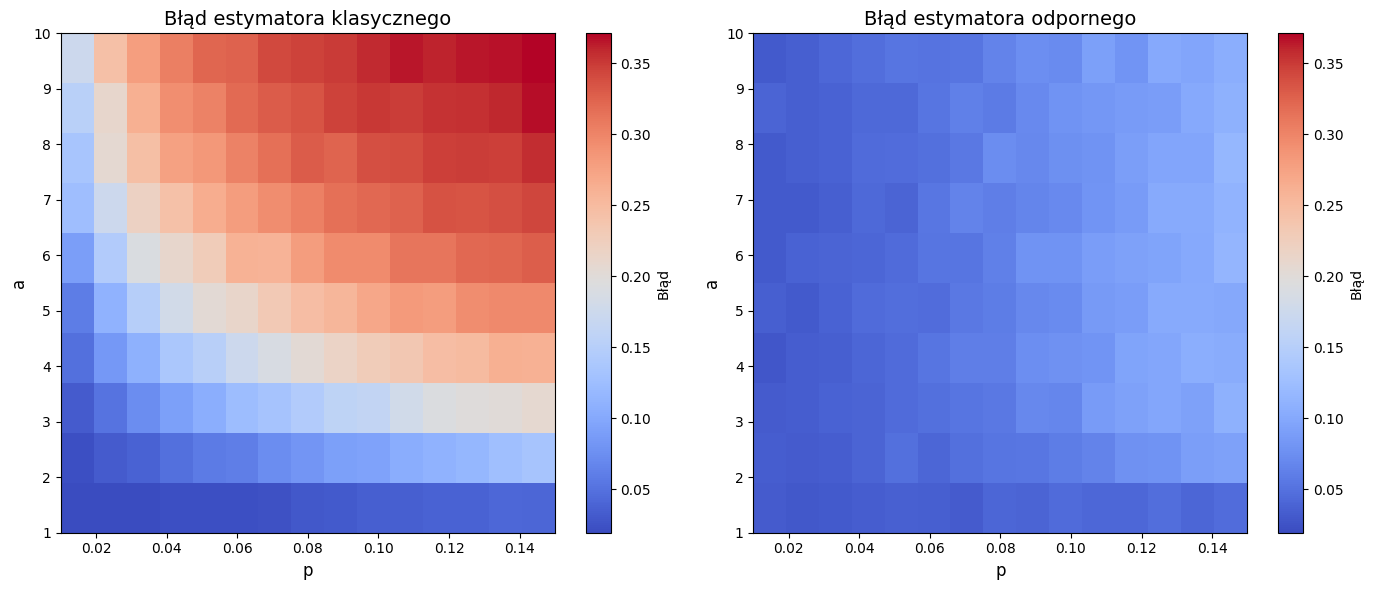

In [ ]:
n = 1000
theta = 2
sigma = 0.5
M = 100  
a_values = np.arange(1, 11)
p_values = np.arange(0.01, 0.16, 0.01)

def calculate_errors(n, theta, sigma, a_values, p_values, M):
    e1_matrix = np.zeros((len(a_values), len(p_values)))
    e2_matrix = np.zeros((len(a_values), len(p_values)))

    for i, alpha in enumerate(a_values):
        for j, p in enumerate(p_values):
            e1, e2 = 0, 0
            for _ in range(M):
                Z_t = np.random.normal(0, sigma, n)
                Y_t = Z_t + theta * np.roll(Z_t, 1)
                Y_t[0] = Z_t[0]

                xi_t = np.random.choice([alpha, -alpha, 0], size=n, p=[p / 2, p / 2, 1 - p])

                X_t = Y_t + xi_t

                h = 1
                rho_hat = autokorelacja_klasyczna(h, X_t)
                rho_a = autokorelacja_odporna(h, X_t)
                rho = theta / (1 + theta**2)

                e1 += abs(rho_hat - rho)
                e2 += abs(rho_a - rho)

            e1_matrix[i, j] = e1 / M
            e2_matrix[i, j] = e2 / M

    return e1_matrix, e2_matrix

e1_matrix, e2_matrix = calculate_errors(n, theta, sigma, a_values, p_values, M)

vmin = min(e1_matrix.min(), e2_matrix.min())
vmax = max(e1_matrix.max(), e2_matrix.max())

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(e1_matrix, aspect='auto', origin='lower', 
           extent=[p_values[0], p_values[-1], a_values[0], a_values[-1]], cmap='coolwarm', vmin=vmin, vmax=vmax)
plt.title('Błąd estymatora klasycznego', fontsize=14)
plt.xlabel('p', fontsize=12)
plt.ylabel('a', fontsize=12)
plt.colorbar(label='Błąd')

plt.subplot(1, 2, 2)
plt.imshow(e2_matrix, aspect='auto', origin='lower', 
           extent=[p_values[0], p_values[-1], a_values[0], a_values[-1]], cmap='coolwarm', vmin=vmin, vmax=vmax)
plt.title('Błąd estymatora odpornego', fontsize=14)
plt.xlabel('p', fontsize=12)
plt.ylabel('a', fontsize=12)
plt.colorbar(label='Błąd')

plt.tight_layout()
plt.show()